# HW3

By:
1. Roni Roitbord (__313575599__)
2. Lior Yaacov Ben Ezra (__209145101__)


In [295]:
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image

In [296]:
# Setting seed because of normal distribution
np.random.seed(24031995)

## Periodic noise

In [297]:
# a.
image = Image.open('grayscaleIMG.jpg').convert('L')
image = image.resize((256, 256))
image = np.array(image)
image = image.astype(float) / 255

In [298]:
frequencies = [1/8, 1/32]
phases = np.random.uniform(0, 2*np.pi, (256, 2))
amplitudes = np.random.normal(1/10, 1/20, (256, 2))
noise_1 = [amplitudes[:, 0] * np.cos(2*np.pi*frequencies[0]*i + phases[:, 0]) for i in range(256)]
noise_1 = np.array(noise_1)
noise_2 = [amplitudes[:, 1] * np.cos(2*np.pi*frequencies[1]*i + phases[:, 1]) for i in range(256)]
noise_2 = np.array(noise_2)
noise_12 = (noise_1 + noise_2) / 2
I1 = image + noise_1
I2 = image + noise_2
I12 = image + noise_12

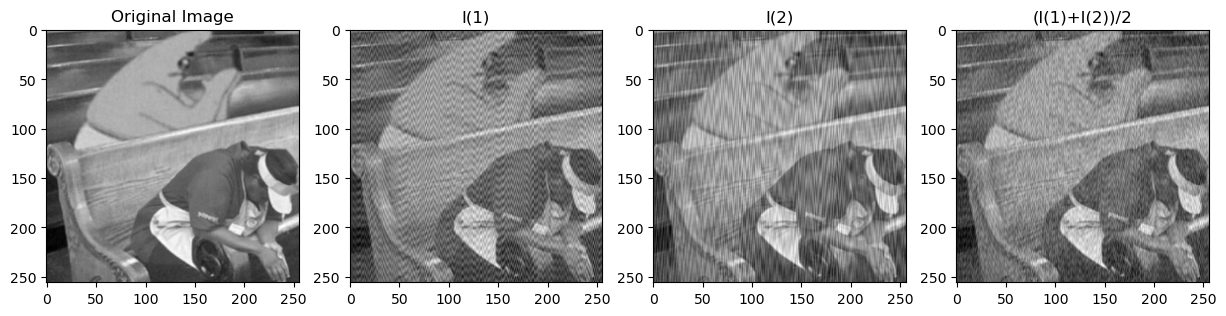

In [299]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(I1, cmap='gray')
axs[1].set_title('I(1)')
axs[2].imshow(I2, cmap='gray')
axs[2].set_title('I(2)')
axs[3].imshow(I12, cmap='gray')
axs[3].set_title('(I(1)+I(2))/2')

plt.show()

In [300]:
#d.
def empirical_DFT(image_row):
    N = len(image_row)  # Number of columns in the image
    k = np.arange(N)
    F = np.zeros(N, dtype=complex)
    for i in range(N):
        F[i] = np.sum(image_row * np.exp(-2j * np.pi * k * i / N))
    return F

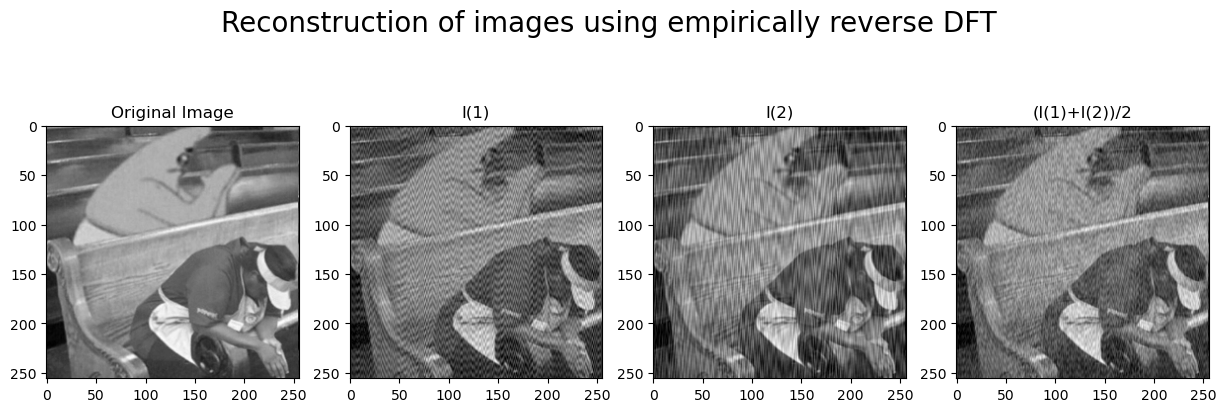

In [301]:
# Compute the DFT representation empirically
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle("Reconstruction of images using empirically reverse DFT", fontsize=20)

I_DFT = np.apply_along_axis(empirical_DFT, axis=1, arr=image).T
I_DFT_empir = np.apply_along_axis(empirical_DFT, axis=1, arr=I_DFT.T)
axs[0].imshow(np.flip(abs(I_DFT_empir),1), cmap='gray')
axs[0].set_title('Original Image')

I1_DFT = np.apply_along_axis(empirical_DFT, axis=1, arr=I1).T
I1_DFT_empir = np.apply_along_axis(empirical_DFT, axis=1, arr=I1_DFT.T)
axs[1].imshow(np.flip(abs(I1_DFT_empir),1), cmap='gray')
axs[1].set_title('I(1)')

I2_DFT = np.apply_along_axis(empirical_DFT, axis=1, arr=I2).T
I2_DFT_empir = np.apply_along_axis(empirical_DFT, axis=1, arr=I2_DFT.T)
axs[2].imshow(np.flip(abs(I2_DFT_empir),1), cmap='gray')
axs[2].set_title('I(2)')

I12_DFT = np.apply_along_axis(empirical_DFT, axis=1, arr=I12).T
I12_DFT_empir = np.apply_along_axis(empirical_DFT, axis=1, arr=I12_DFT.T)
axs[3].imshow(np.flip(abs(I12_DFT_empir),1), cmap='gray')
axs[3].set_title('(I(1)+I(2))/2')

plt.show()

In [302]:
# Theoretical part:
def theoretical_DFT(f, A, N, phi):
    res = np.zeros(N, dtype=complex)
    for i in range(N):
        sum_1 = 0
        sum_2 = 0
        for j in range(N):
            sum_1 += np.cos((2 * np.pi * j / N) * ((f * N) - i))
            sum_2 += np.cos((2 * np.pi * j / N) * ((f * N) + i))

        res[i] = (A / (2 * np.sqrt(N))) * (sum_1 * np.exp(1j * phi) + sum_2 * np.exp(-1j * phi))

    return res

In [303]:
# Compute the DFT representation theoretically
#fig, axs = plt.subplots(1, 3, figsize=(15, 5))
#fig.suptitle("Reconstruction of images using theoretically reverse DFT", fontsize=20)

I1_DFT_theory = image + np.array([theoretical_DFT(f=1/8,
                                          A=amplitudes[:, 0][i],
                                          N=256,
                                          phi=phases[:, 0][i])
                          for i in range(256)])
#axs[0].imshow(abs(I1_DFT_theory), cmap='gray')
#axs[0].set_title('I(1)')

I2_DFT_theory = image + np.array([theoretical_DFT(f=1/32,
                                          A=amplitudes[:, 1][i],
                                          N=256,
                                          phi=phases[:, 1][i])
                          for i in range(256)])
#axs[1].imshow(abs(I1_DFT_theory), cmap='gray')
#axs[1].set_title('I(2)')

I12_DFT_theory = image + (I1_DFT_theory+I2_DFT_theory)/2
#axs[2].imshow(abs(I12_DFT_theory), cmap='gray')
#axs[2].set_title('(I(1)+I(2))/2')

#plt.show()

In [305]:
max_diff1 = np.max(I1_DFT_theory - np.flip(abs(I1_DFT_empir),1))
max_diff2 = np.max(I2_DFT_theory - np.flip(abs(I2_DFT_empir),1))
max_diff12 = np.max(I12_DFT_theory - np.flip(abs(I12_DFT_empir),1))

print(f'max diff between empirical & theoretical elements of I1: {max_diff1}')
print(f'max diff between empirical & theoretical elements of I2: {max_diff2}')
print(f'max diff between empirical & theoretical elements of I12: {max_diff12}')

max diff between empirical & theoretical elements of I1: (0.1671697981597984-9.391373290399892e-17j)
max diff between empirical & theoretical elements of I2: (0.04225564816051651-6.919352465707399e-18j)
max diff between empirical & theoretical elements of I12: (0.05874359406850288-1.9100298477498897e-17j)


In [307]:
# e.
def mse(image1, image2):
    image1 = np.array(image1)
    image2 = np.array(image2)
    squared_diff = np.square(image1 - image2)
    mse_val = np.sum(squared_diff) / (image1.shape[0] * image1.shape[1])
    return mse_val

def DFT_matrix(n):
    o = np.exp(-2j * np.pi / n)
    indices = np.arange(n)
    exponents = np.outer(indices, indices)
    DFT_matrix = (1 / np.sqrt(n)) * o ** exponents
    return DFT_matrix

In [308]:
N = 256
DFT_mat = DFT_matrix(N)
conjucated_DFT_mat = np.conjugate(DFT_mat)

I1_DFT = np.matmul(DFT_mat, I1.T).T
I1_DFT[:,int(N * frequencies[0])] = 0
I1_DFT[:,-int(N * frequencies[0])] = 0
I1_DFT_empir = np.matmul(conjucated_DFT_mat,I1_DFT.T).T

I2_DFT = np.matmul(DFT_mat, I2.T).T
I2_DFT[:,int(N * frequencies[1])] = 0
I2_DFT[:,-int(N * frequencies[1])] = 0
I2_DFT_empir = np.matmul(conjucated_DFT_mat,I2_DFT.T).T

I12_DFT = np.matmul(DFT_mat, I12.T).T
I12_DFT[:,int(N * frequencies[0])] = 0
I12_DFT[:,-int(N * frequencies[0])] = 0
I12_DFT[:,int(N * frequencies[1])] = 0
I12_DFT[:,-int(N * frequencies[1])] = 0
I12_DFT_empir = np.matmul(conjucated_DFT_mat,I12_DFT.T).T

In [328]:
mse1_orig = mse(image, I1)
mse2_orig = mse(image, I2)
mse12_orig = mse(image, I12)

mse1_fix = mse(image, abs(I1_DFT_empir))
mse2_fix = mse(image, abs(I2_DFT_empir))
mse12_fix = mse(image, abs(I12_DFT_empir))

print(f'MSE differences:\n')
print(f'I1:\nOriginal={mse1_orig} \nfixed={mse1_fix}\n')
print(f'I2:\nOriginal={mse2_orig} \nfixed={mse2_fix}\n')
print(f'I12:\nOriginal={mse12_orig} \nfixed={mse12_fix}\n')

MSE differences:

I1:
Original=0.006198968588458775 
fixed=0.006163644196816657

I2:
Original=0.006262211482520202 
fixed=0.006625107414834654

I12:
Original=0.0031152950177447455 
fixed=0.0035022889616623696

